In [206]:
import requests
import pandas as pd
from tqdm import tqdm
from bs4 import BeautifulSoup

In [207]:
# URL of the webpage containing the links to CSV files
url = "http://insideairbnb.com/get-the-data/"

# Send an HTTP GET request to the URL
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Parse the HTML content of the webpage
    soup = BeautifulSoup(response.content, "html.parser")

    # Find all links in the webpage
    links = soup.find_all("a")

    # List to store all the listings for USA.
    usa_listings = []

    # Iterate through the links
    for link in links:
        href = link.get("href")
        if href and ("united-states" in href) and href.endswith("listings.csv.gz"):
            usa_listings.append(href)
else:
    print("Failed to fetch webpage")

In [208]:
len(usa_listings) # Links for listings data for 34 cities in USA.

34

In [209]:
usa_listings[:5] # Links where the files are stored.

['https://data.insideairbnb.com/united-states/ny/albany/2024-03-10/data/listings.csv.gz',
 'https://data.insideairbnb.com/united-states/nc/asheville/2023-12-18/data/listings.csv.gz',
 'https://data.insideairbnb.com/united-states/tx/austin/2023-12-15/data/listings.csv.gz',
 'https://data.insideairbnb.com/united-states/ma/boston/2023-12-18/data/listings.csv.gz',
 'https://data.insideairbnb.com/united-states/mt/bozeman/2024-03-19/data/listings.csv.gz']

In [210]:
# Load the data for cities.
city_data = []

for listing in tqdm(usa_listings):
  df = pd.read_csv(listing)
  df["link"] = listing
  city_data.append(df)

 15%|█▍        | 5/34 [00:02<00:14,  2.01it/s]C:\Users\fredl\AppData\Local\Temp\ipykernel_79664\438877119.py:5: DtypeWarning: Columns (68) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(listing)
100%|██████████| 34/34 [00:18<00:00,  1.89it/s]


In [211]:
# Concatenate all the cities data to create a single dataframe.
usa_data = pd.concat(city_data)
display(usa_data.head())
print(f"Dataset Shape: {usa_data.shape}")

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,link
0,1489424,https://www.airbnb.com/rooms/1489424,20240310234900,2024-03-10,city scrape,"Welcoming, easygoing, comfy bed, entire level","Queen size bed, extra comfy mattress, with acc...",Quiet yet convenient.,https://a0.muscache.com/pictures/21977748/1dc8...,5294164,...,4.82,4.81,NaN,f,1,0,1,0,1.94,https://data.insideairbnb.com/united-states/ny...
1,2992450,https://www.airbnb.com/rooms/2992450,20240310234900,2024-03-11,city scrape,Luxury 2 bedroom apartment,The apartment is located in a quiet neighborho...,NaN,https://a0.muscache.com/pictures/44627226/0e72...,4621559,...,3.22,3.67,NaN,f,1,1,0,0,0.08,https://data.insideairbnb.com/united-states/ny...
2,3820211,https://www.airbnb.com/rooms/3820211,20240310234900,2024-03-11,city scrape,Restored Precinct in Center Sq. w/Parking,"Cozy, cool little 1BR Apt in the heart Albany'...","Great restaurants, architecture, walking, peop...",https://a0.muscache.com/pictures/prohost-api/H...,19648678,...,4.82,4.78,NaN,f,4,4,0,0,2.51,https://data.insideairbnb.com/united-states/ny...
3,5651579,https://www.airbnb.com/rooms/5651579,20240310234900,2024-03-11,city scrape,Large studio apt by Capital Center & ESP@,"Spacious studio with hardwood floors, fully eq...",The neighborhood is very eclectic. We have a v...,https://a0.muscache.com/pictures/b3fc42f3-6e5e...,29288920,...,4.79,4.64,NaN,f,2,1,1,0,3.13,https://data.insideairbnb.com/united-states/ny...
4,6623339,https://www.airbnb.com/rooms/6623339,20240310234900,2024-03-11,city scrape,Center Sq. Loft in Converted Precinct w/ Parking,Large renovated 1 bedroom apartment in convert...,"Located in Albany's finest urban neighborhood,...",https://a0.muscache.com/pictures/prohost-api/H...,19648678,...,4.81,4.72,NaN,f,4,4,0,0,2.87,https://data.insideairbnb.com/united-states/ny...


Dataset Shape: (288465, 76)


In [212]:
listings = usa_data.copy()
listings.reset_index(drop=True, inplace=True)
listings

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,link
0,1489424,https://www.airbnb.com/rooms/1489424,20240310234900,2024-03-10,city scrape,"Welcoming, easygoing, comfy bed, entire level","Queen size bed, extra comfy mattress, with acc...",Quiet yet convenient.,https://a0.muscache.com/pictures/21977748/1dc8...,5294164,...,4.82,4.81,NaN,f,1,0,1,0,1.94,https://data.insideairbnb.com/united-states/ny...
1,2992450,https://www.airbnb.com/rooms/2992450,20240310234900,2024-03-11,city scrape,Luxury 2 bedroom apartment,The apartment is located in a quiet neighborho...,NaN,https://a0.muscache.com/pictures/44627226/0e72...,4621559,...,3.22,3.67,NaN,f,1,1,0,0,0.08,https://data.insideairbnb.com/united-states/ny...
2,3820211,https://www.airbnb.com/rooms/3820211,20240310234900,2024-03-11,city scrape,Restored Precinct in Center Sq. w/Parking,"Cozy, cool little 1BR Apt in the heart Albany'...","Great restaurants, architecture, walking, peop...",https://a0.muscache.com/pictures/prohost-api/H...,19648678,...,4.82,4.78,NaN,f,4,4,0,0,2.51,https://data.insideairbnb.com/united-states/ny...
3,5651579,https://www.airbnb.com/rooms/5651579,20240310234900,2024-03-11,city scrape,Large studio apt by Capital Center & ESP@,"Spacious studio with hardwood floors, fully eq...",The neighborhood is very eclectic. We have a v...,https://a0.muscache.com/pictures/b3fc42f3-6e5e...,29288920,...,4.79,4.64,NaN,f,2,1,1,0,3.13,https://data.insideairbnb.com/united-states/ny...
4,6623339,https://www.airbnb.com/rooms/6623339,20240310234900,2024-03-11,city scrape,Center Sq. Loft in Converted Precinct w/ Parking,Large renovated 1 bedroom apartment in convert...,"Located in Albany's finest urban neighborhood,...",https://a0.muscache.com/pictures/prohost-api/H...,19648678,...,4.81,4.72,NaN,f,4,4,0,0,2.87,https://data.insideairbnb.com/united-states/ny...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288460,1047064894296117631,https://www.airbnb.com/rooms/1047064894296117631,20231218032619,2023-12-18,city scrape,Rental unit in Washington · ★New · 1 bedroom ·...,NaN,"This furnished rental is situated in Shaw, a h...",https://a0.muscache.com/pictures/prohost-api/H...,107434423,...,NaN,NaN,NaN,f,234,234,0,0,NaN,https://data.insideairbnb.com/united-states/dc...
288461,1047730533367174366,https://www.airbnb.com/rooms/1047730533367174366,20231218032619,2023-12-18,city scrape,Home in Washington · ★New · 1 bedroom · 1 bed ...,NaN,Petworth,https://a0.muscache.com/pictures/e9e7aaa1-ca9f...,437660791,...,NaN,NaN,Exempt,t,28,6,22,0,NaN,https://data.insideairbnb.com/united-states/dc...
288462,1047772826607759074,https://www.airbnb.com/rooms/1047772826607759074,20231218032619,2023-12-18,city scrape,Rental unit in Washington · ★New · 1 bedroom ·...,NaN,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,437660791,...,NaN,NaN,Exempt,t,28,6,22,0,NaN,https://data.insideairbnb.com/united-states/dc...
288463,1047777612294831826,https://www.airbnb.com/rooms/1047777612294831826,20231218032619,2023-12-18,city scrape,Rental unit in Washington · ★New · 1 bedroom ·...,NaN,NaN,https://a0.muscache.com/pictures/3a57db34-796d...,437660791,...,NaN,NaN,Exempt,t,28,6,22,0,NaN,https://data.insideairbnb.com/united-states/dc...


In [213]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288465 entries, 0 to 288464
Data columns (total 76 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   id                                            288465 non-null  int64  
 1   listing_url                                   288465 non-null  object 
 2   scrape_id                                     288465 non-null  int64  
 3   last_scraped                                  288465 non-null  object 
 4   source                                        288465 non-null  object 
 5   name                                          288463 non-null  object 
 6   description                                   92385 non-null   object 
 7   neighborhood_overview                         175042 non-null  object 
 8   picture_url                                   288463 non-null  object 
 9   host_id                                       28

In [214]:
listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [215]:
listings.iloc[0].values

array([1489424, 'https://www.airbnb.com/rooms/1489424', 20240310234900,
       '2024-03-10', 'city scrape',
       'Welcoming, easygoing, comfy bed, entire level',
       'Queen size bed, extra comfy mattress, with access to a private bathroom with shower. A single bed is also available in that room. You will have an entire level of the house to yourself. The large, well-lit room is located in our furnished basement. Central A/C, wi-fi. One mile to UAlbany and College of St. Rose. 35 minutes to Saratoga tracks and SPAC. An hour to mountains. Quiet dead-end street with ample on-street parking.  Equipped kitchen for your use. Hi-def cable tv',
       'Quiet yet convenient.',
       'https://a0.muscache.com/pictures/21977748/1dc80cd7_original.jpg',
       5294164, 'https://www.airbnb.com/users/show/5294164', 'Efrat',
       '2013-03-02', 'Albany, NY',
       'I am originally from Brooklyn, New York. As an adult I have lived in both the U.S. and Israel. I am on faculty at Empire State Coll

In [216]:
listings["City"] = listings["link"].apply(lambda x: x.split('/')[5])
listings["State"] = listings["link"].apply(lambda x: x.split('/')[4])
display(listings[["host_location", "City", "State"]].head())
display(listings[["host_location", "City", "State"]].tail())

,host_location,City,State
0,"Albany, NY",albany,ny
1,"New York, NY",albany,ny
2,NaN,albany,ny
3,"Albany, NY",albany,ny
4,NaN,albany,ny


,host_location,City,State
288460,"New York, NY",washington-dc,dc
288461,NaN,washington-dc,dc
288462,NaN,washington-dc,dc
288463,NaN,washington-dc,dc
288464,"Washington, DC",washington-dc,dc


In [217]:
listings["id"].nunique()

288464

In [218]:
listings["id"].value_counts()

id
1398981                2
1489424                1
20435714               1
780367558387044721     1
21709727               1
                      ..
48508033               1
48523071               1
46585185               1
9979535                1
1047931080098470138    1
Name: count, Length: 288464, dtype: int64

In [219]:
print(listings.shape)
listings = listings.drop_duplicates(subset="id").reset_index(drop=True)
print(listings.shape)

(288465, 78)
(288464, 78)


In [220]:
listings

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,link,City,State
0,1489424,https://www.airbnb.com/rooms/1489424,20240310234900,2024-03-10,city scrape,"Welcoming, easygoing, comfy bed, entire level","Queen size bed, extra comfy mattress, with acc...",Quiet yet convenient.,https://a0.muscache.com/pictures/21977748/1dc8...,5294164,...,NaN,f,1,0,1,0,1.94,https://data.insideairbnb.com/united-states/ny...,albany,ny
1,2992450,https://www.airbnb.com/rooms/2992450,20240310234900,2024-03-11,city scrape,Luxury 2 bedroom apartment,The apartment is located in a quiet neighborho...,NaN,https://a0.muscache.com/pictures/44627226/0e72...,4621559,...,NaN,f,1,1,0,0,0.08,https://data.insideairbnb.com/united-states/ny...,albany,ny
2,3820211,https://www.airbnb.com/rooms/3820211,20240310234900,2024-03-11,city scrape,Restored Precinct in Center Sq. w/Parking,"Cozy, cool little 1BR Apt in the heart Albany'...","Great restaurants, architecture, walking, peop...",https://a0.muscache.com/pictures/prohost-api/H...,19648678,...,NaN,f,4,4,0,0,2.51,https://data.insideairbnb.com/united-states/ny...,albany,ny
3,5651579,https://www.airbnb.com/rooms/5651579,20240310234900,2024-03-11,city scrape,Large studio apt by Capital Center & ESP@,"Spacious studio with hardwood floors, fully eq...",The neighborhood is very eclectic. We have a v...,https://a0.muscache.com/pictures/b3fc42f3-6e5e...,29288920,...,NaN,f,2,1,1,0,3.13,https://data.insideairbnb.com/united-states/ny...,albany,ny
4,6623339,https://www.airbnb.com/rooms/6623339,20240310234900,2024-03-11,city scrape,Center Sq. Loft in Converted Precinct w/ Parking,Large renovated 1 bedroom apartment in convert...,"Located in Albany's finest urban neighborhood,...",https://a0.muscache.com/pictures/prohost-api/H...,19648678,...,NaN,f,4,4,0,0,2.87,https://data.insideairbnb.com/united-states/ny...,albany,ny
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288459,1047064894296117631,https://www.airbnb.com/rooms/1047064894296117631,20231218032619,2023-12-18,city scrape,Rental unit in Washington · ★New · 1 bedroom ·...,NaN,"This furnished rental is situated in Shaw, a h...",https://a0.muscache.com/pictures/prohost-api/H...,107434423,...,NaN,f,234,234,0,0,NaN,https://data.insideairbnb.com/united-states/dc...,washington-dc,dc
288460,1047730533367174366,https://www.airbnb.com/rooms/1047730533367174366,20231218032619,2023-12-18,city scrape,Home in Washington · ★New · 1 bedroom · 1 bed ...,NaN,Petworth,https://a0.muscache.com/pictures/e9e7aaa1-ca9f...,437660791,...,Exempt,t,28,6,22,0,NaN,https://data.insideairbnb.com/united-states/dc...,washington-dc,dc
288461,1047772826607759074,https://www.airbnb.com/rooms/1047772826607759074,20231218032619,2023-12-18,city scrape,Rental unit in Washington · ★New · 1 bedroom ·...,NaN,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,437660791,...,Exempt,t,28,6,22,0,NaN,https://data.insideairbnb.com/united-states/dc...,washington-dc,dc
288462,1047777612294831826,https://www.airbnb.com/rooms/1047777612294831826,20231218032619,2023-12-18,city scrape,Rental unit in Washington · ★New · 1 bedroom ·...,NaN,NaN,https://a0.muscache.com/pictures/3a57db34-796d...,437660791,...,Exempt,t,28,6,22,0,NaN,https://data.insideairbnb.com/united-states/dc...,washington-dc,dc


In [221]:
#listings["host_id"].nunique()

In [222]:
#listings["host_id"].value_counts()

In [223]:
#listings["property_type"].value_counts()

In [224]:
#listings["room_type"].value_counts()

In [225]:
#listings["instant_bookable"].value_counts()

In [226]:
"""starter_columns = ['id', 'host_id', 'host_since', 'host_location','host_response_time', 'host_response_rate', 'host_acceptance_rate',
                  'host_is_superhost', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications',
                  'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed',
                  'latitude', 'longitude', 'room_type', 'accommodates', 'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
                  'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'review_scores_rating', 'review_scores_accuracy',
                  'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location',
                  'review_scores_value', 'instant_bookable', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes',
                  'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms', 'reviews_per_month',
                  'City', 'State']

len(starter_columns)"""

"starter_columns = ['id', 'host_id', 'host_since', 'host_location','host_response_time', 'host_response_rate', 'host_acceptance_rate',\n                  'host_is_superhost', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications',\n                  'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed',\n                  'latitude', 'longitude', 'room_type', 'accommodates', 'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',\n                  'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'review_scores_rating', 'review_scores_accuracy',\n                  'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location',\n                  'review_scores_value', 'instant_bookable', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes',\n                  'calculated_host_li

In [227]:
#trimmed_listings = listings[starter_columns]
#trimmed_listings.info()

In [228]:
#listings["bedrooms"].value_counts()

In [229]:
#listings.iloc[0].values

In [230]:
#listings.columns

In [231]:
#starter_listings = trimmed_listings.query("calculated_host_listings_count == 1").reset_index(drop = True)
#starter_listings.info()

In [232]:
#starter_listings.query("number_of_reviews == 0")

# Questions to answer

In [233]:
# Compare cancellation policy in terms of price, rating, and number of listings.
# A metric of plots that compare super host and regular host in terms of price, review score, availability(percentage of booked dates in a year)
# How does managing multiple listings affect the review scores, occupancy
# How have prices changed over the past year in relation to the number of reviews a listing has received in the last 12 months?
# Is there a relationship between the length of the name for a listing and its occupancy
# Does host_response_rate, host_response_time, and host_acceptance_rate have an impact on the price and ratings?
# How can host verification affect other variables?

# Creat a starter dataset

In [234]:
starter_columns = ['id', 'host_id','host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_identity_verified', 'neighbourhood_cleansed',
                  'latitude', 'longitude', 'room_type', 'accommodates', 'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price', 'number_of_reviews', 'number_of_reviews_ltm',
                  'number_of_reviews_l30d', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication',
                  'review_scores_location', 'review_scores_value', 'instant_bookable', 'calculated_host_listings_count', 'reviews_per_month', 'City', 'State']

len(starter_columns)

32

In [235]:
trimmed_listings = listings[starter_columns]
trimmed_listings.shape

(288464, 32)

In [236]:
#Calculate percent of missing values in each column
count_missing_value = trimmed_listings.isna().sum()
total_rows = len(trimmed_listings)
percent_missing = (count_missing_value / total_rows) * 100
print(percent_missing)
#Remove column with more than 20% missing values
keep_col = percent_missing[percent_missing < 20].index
listing_filter = trimmed_listings[keep_col]
col_removed = len(trimmed_listings.columns) - len(listing_filter.columns)
print(f"The number of features removed: {col_removed}")
trimmed_listings = listing_filter
trimmed_listings['review_scores_rating'] = listings['review_scores_rating']
trimmed_listings['reviews_per_month'] = listings['reviews_per_month']

id                                 0.000000
host_id                            0.000000
host_response_time                18.951412
host_response_rate                18.951412
host_acceptance_rate              14.244065
host_is_superhost                  0.421890
host_identity_verified             0.011787
neighbourhood_cleansed             0.321704
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
accommodates                       0.000000
bathrooms_text                     0.125839
bedrooms                          69.428421
beds                               7.847426
amenities                          0.000000
price                             10.222073
number_of_reviews                  0.000000
number_of_reviews_ltm              0.000000
number_of_reviews_l30d             0.000000
review_scores_rating              22.880151
review_scores_accuracy            22.912044
review_scores_cleanliness       

In [237]:
listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [238]:
listings.iloc[111].values

array([48172884, 'https://www.airbnb.com/rooms/48172884', 20240310234900,
       '2024-03-11', 'city scrape', 'The Down Under Suite',
       'This home is a gorgeous 100 year old Victorian<br />This suite is located on the 2nd floor. All the comforts of home! A very clean and quiet setting makes for a comfortable stay here at the Inn. Perfect for the business traveler or Traveling nurses that have contracts with one of the local hospitals located minutes away.',
       nan,
       'https://a0.muscache.com/pictures/ff01b559-730a-4974-8502-8f5391aa1fe0.jpg',
       98744672, 'https://www.airbnb.com/users/show/98744672', 'Bela',
       '2016-10-08', 'Albany, NY',
       'My name is Bela Schuch, I am manager of The Inn at South Lake  here in Albany , we hope you enjoy your stay with us at the Inn Thank you !',
       'within an hour', '100%', '96%', 't',
       'https://a0.muscache.com/im/pictures/user/eccd4f9b-870c-4c2b-ae97-3fb7f5feb710.jpg?aki_policy=profile_small',
       'https://a0.m

In [239]:
starter_listings_df = trimmed_listings.copy()#query("calculated_host_listings_count == 1").reset_index(drop = True)
starter_listings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288464 entries, 0 to 288463
Data columns (total 25 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              288464 non-null  int64  
 1   host_id                         288464 non-null  int64  
 2   host_response_time              233796 non-null  object 
 3   host_response_rate              233796 non-null  object 
 4   host_acceptance_rate            247375 non-null  object 
 5   host_is_superhost               287247 non-null  object 
 6   host_identity_verified          288430 non-null  object 
 7   neighbourhood_cleansed          287536 non-null  object 
 8   latitude                        288464 non-null  float64
 9   longitude                       288464 non-null  float64
 10  room_type                       288464 non-null  object 
 11  accommodates                    288464 non-null  int64  
 12  bathrooms_text  

In [240]:
#starter_listings_df.describe()

# Data Preprocessing

In [241]:
starter_listings_df["host_response_time"].value_counts()

host_response_time
within an hour        186242
within a few hours     28573
within a day           13538
a few days or more      5443
Name: count, dtype: int64

## Modify the columns and their dtypes based on their values

In [242]:
# change host_response_time from categorical to numerical. Mapping  1, 2, 3, 4 - from fastest response to late response.
response_time_map = {"within an hour": 1,
                     "within a few hours": 2,
                     "within a day": 3,
                     "a few days or more": 4}

starter_listings_df["host_response_time"] = starter_listings_df["host_response_time"].map(response_time_map).astype("category")

In [243]:
# Convert host_response_rate, host_acceptance_rate columns from strings to numerical.

starter_listings_df["host_response_rate"] = starter_listings_df["host_response_rate"].apply(lambda x: int(x[:-1]) if isinstance(x, str) else x)
starter_listings_df["host_acceptance_rate"] = starter_listings_df["host_acceptance_rate"].apply(lambda x: int(x[:-1]) if isinstance(x, str) else x)
starter_listings_df["host_is_superhost"] = starter_listings_df["host_is_superhost"].apply(lambda x: 0 if x == 'f' else 1).astype("category")
starter_listings_df["host_identity_verified"] = starter_listings_df["host_identity_verified"].apply(lambda x: 0 if x == 'f' else 1).astype("category")
starter_listings_df["amenities"] = starter_listings_df["amenities"].apply(lambda x: len(eval(x)))
starter_listings_df["price"] = starter_listings_df["price"].apply(lambda x: float(''.join(x[1:].split(','))) if isinstance(x, str) else x)
starter_listings_df["instant_bookable"] = starter_listings_df["instant_bookable"].apply(lambda x: 0 if x == 'f' else 1).astype("category")

starter_listings_df["neighbourhood_cleansed"] = starter_listings_df["neighbourhood_cleansed"].astype("category")
starter_listings_df["room_type"] = starter_listings_df["room_type"].astype("category")
starter_listings_df["City"] = starter_listings_df["City"].astype("category")
starter_listings_df["State"] = starter_listings_df["State"].astype("category")

starter_listings_df.drop(["bathrooms_text"], axis = 1, inplace = True)
starter_listings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288464 entries, 0 to 288463
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype   
---  ------                          --------------   -----   
 0   id                              288464 non-null  int64   
 1   host_id                         288464 non-null  int64   
 2   host_response_time              233796 non-null  category
 3   host_response_rate              233796 non-null  float64 
 4   host_acceptance_rate            247375 non-null  float64 
 5   host_is_superhost               288464 non-null  category
 6   host_identity_verified          288464 non-null  category
 7   neighbourhood_cleansed          287536 non-null  category
 8   latitude                        288464 non-null  float64 
 9   longitude                       288464 non-null  float64 
 10  room_type                       288464 non-null  category
 11  accommodates                    288464 non-null  int64   
 12  be

In [244]:
num_cols = starter_listings_df.select_dtypes(include=['float64', 'int64']).columns
cat_cols = starter_listings_df.select_dtypes(include=['category']).columns

num_cols, cat_cols, len(num_cols), len(cat_cols)

(Index(['id', 'host_id', 'host_response_rate', 'host_acceptance_rate',
        'latitude', 'longitude', 'accommodates', 'beds', 'amenities', 'price',
        'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
        'calculated_host_listings_count', 'review_scores_rating',
        'reviews_per_month'],
       dtype='object'),
 Index(['host_response_time', 'host_is_superhost', 'host_identity_verified',
        'neighbourhood_cleansed', 'room_type', 'instant_bookable', 'City',
        'State'],
       dtype='object'),
 16,
 8)

In [245]:
starter_listings_df[num_cols].describe()

,id,host_id,host_response_rate,host_acceptance_rate,latitude,longitude,accommodates,beds,amenities,price,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,calculated_host_listings_count,review_scores_rating,reviews_per_month
count,2.884640e+05,2.884640e+05,233796.000000,247375.000000,288464.000000,288464.000000,288464.000000,265827.000000,288464.000000,258977.000000,288464.000000,288464.000000,288464.000000,288464.000000,222463.000000,222335.000000
mean,4.025330e+17,1.788110e+08,96.118377,88.743103,34.665336,-105.684353,4.318473,2.438770,19.286750,278.765941,41.260369,10.456653,0.639903,34.831771,4.765491,1.543141
std,4.292289e+17,1.746780e+08,14.521662,21.686573,6.963344,26.170668,2.970429,1.985165,21.431471,981.886012,82.814692,18.642283,1.461329,99.349525,0.414570,1.812961
min,6.000000e+00,2.300000e+01,0.000000,0.000000,18.920250,-159.714620,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,3.192939e+07,2.653036e+07,100.000000,90.000000,30.336629,-118.539884,2.000000,1.000000,0.000000,95.000000,1.000000,0.000000,0.000000,1.000000,4.710000,0.280000
50%,5.364763e+07,1.074344e+08,100.000000,98.000000,36.009522,-115.056474,4.000000,2.000000,12.000000,150.000000,8.000000,2.000000,0.000000,3.000000,4.890000,0.970000
75%,8.372291e+17,3.260847e+08,100.000000,100.000000,40.685874,-80.139217,6.000000,3.000000,36.000000,262.000000,44.000000,14.000000,1.000000,17.000000,5.000000,2.280000
max,1.117529e+18,5.677585e+08,100.000000,100.000000,47.734087,-70.996000,16.000000,132.000000,119.000000,100000.000000,3501.000000,1065.000000,146.000000,842.000000,5.000000,91.490000


In [246]:
starter_listings_df[cat_cols].describe()

,host_response_time,host_is_superhost,host_identity_verified,neighbourhood_cleansed,room_type,instant_bookable,City,State
count,233796.0,288464,288464,287536,288464,288464,288464,288464
unique,4.0,2,2,1473,4,2,34,20
top,1.0,0,1,Unincorporated Areas,Entire home/apt,0,los-angeles,ca
freq,186242.0,176688,254298,15187,216337,196106,45591,81887


### Remove Outliers

In [247]:
#Remove outliers for all Numerical Columns
"""Q1 = starter_listings_df[num_cols].quantile(0.25)
Q3 = starter_listings_df[num_cols].quantile(0.75)
IQR = Q3 - Q1
starter_listings_df = starter_listings_df[~((starter_listings_df[num_cols] < (Q1 - 2.2 * IQR)) |
                                   (starter_listings_df[num_cols] > (Q3 + 2.2 * IQR))).any(axis=1)]
"""
starter_listings_df = starter_listings_df[starter_listings_df['price'] <= 1200]


## Handling Missing values.

### Simple Imputation with Mean and Model

In [248]:
simple_imputed_df = starter_listings_df.copy()

simple_imputed_df[num_cols] = simple_imputed_df[num_cols].fillna(simple_imputed_df[num_cols].mean())
simple_imputed_df[cat_cols] = simple_imputed_df[cat_cols].fillna(simple_imputed_df[cat_cols].mode().iloc[0])

simple_imputed_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 253798 entries, 0 to 288463
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype   
---  ------                          --------------   -----   
 0   id                              253798 non-null  int64   
 1   host_id                         253798 non-null  int64   
 2   host_response_time              253798 non-null  category
 3   host_response_rate              253798 non-null  float64 
 4   host_acceptance_rate            253798 non-null  float64 
 5   host_is_superhost               253798 non-null  category
 6   host_identity_verified          253798 non-null  category
 7   neighbourhood_cleansed          253798 non-null  category
 8   latitude                        253798 non-null  float64 
 9   longitude                       253798 non-null  float64 
 10  room_type                       253798 non-null  category
 11  accommodates                    253798 non-null  int64   
 12  beds   

## EDA
### Question 1-7
1. Price distribution
2. Review score distribution
3. How availability varies throughout the year and identify any seasonal patterns. (We can identify local events when there is a peak of availability in certain dates.
4. Plot the locations of listings on a map to visualize geographic distribution and density.
5. Compare neighborhoods in terms of price, rating, and number of listings.
6. Compare room types in terms of price, rating, and number of listing.
7. Relation between number of amenities and price.


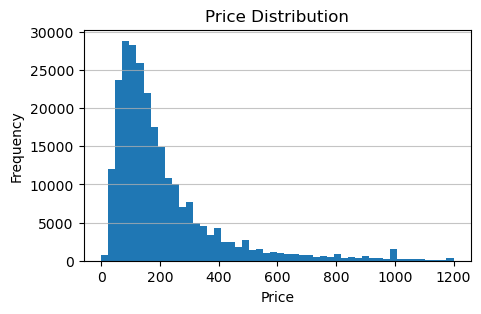

In [249]:
"""
1. Price distribution
"""
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(5,3))
plt.hist(simple_imputed_df['price'], bins=50)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()


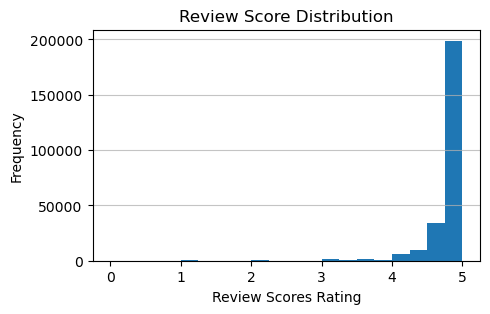

In [250]:
"""
2. Review scores distribution
"""
plt.figure(figsize=(5,3))
plt.hist(simple_imputed_df['review_scores_rating'], bins=20)
plt.title('Review Score Distribution')
plt.xlabel('Review Scores Rating')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [251]:
"""
3. How common is host identity verification, and does it impact guest trust as reflected in booking rates or reviews?
"""
# 1. Ratio of varified host 
verification_ratio = simple_imputed_df['host_identity_verified'].astype(int).mean()
print('verification_ratio:', verification_ratio)

# 3. Average rating of varified and unverified host
average_score_verified = simple_imputed_df[simple_imputed_df['host_identity_verified'] == 1]['review_scores_rating'].mean()
average_score_unverified = simple_imputed_df[simple_imputed_df['host_identity_verified'] == 0]['review_scores_rating'].mean()
print(f'average_score_verified: {average_score_verified}, average_score_unverified: {average_score_unverified}')

# 4. Average number of review received by variafied and unvarified host
average_reviews_verified = simple_imputed_df[simple_imputed_df['host_identity_verified'] == 1]['number_of_reviews'].mean()
average_reviews_unverified = simple_imputed_df[simple_imputed_df['host_identity_verified'] == 0]['number_of_reviews'].mean()
print(f'average_reviews_verified: {average_reviews_verified}, average_reviews_unverified: {average_reviews_unverified}')

# 5. Average price for varified and unvarified host
average_price_verified = simple_imputed_df[simple_imputed_df['host_identity_verified'] == 1]['price'].mean()
average_price_unverified = simple_imputed_df[simple_imputed_df['host_identity_verified'] == 0]['price'].mean()
print(f'average_price_verified: {average_price_verified}, review_count_unverified: {average_price_unverified}')


verification_ratio: 0.8870282665742046
average_score_verified: 4.767520757818413, average_score_unverified: 4.778515775434613
average_reviews_verified: 44.9210930767659, average_reviews_unverified: 43.017578125
average_price_verified: 209.67797144710073, review_count_unverified: 209.68174525669642


In [252]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [253]:
"""
4. Plot the locations of listings on a map to visualize geographic distribution and density.
"""
import folium
from folium.plugins import HeatMap

# US map
m = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

# Add heatmap to map
heat_data = [[row['latitude'], row['longitude'], row['price']] for index, row in simple_imputed_df.iterrows()]
HeatMap(heat_data).add_to(m)

# Add data points and price for each point
for idx, row in simple_imputed_df.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=3,
        popup='Price: ${}'.format(row['price']),
        fill=True,
        color='blue',
        fill_color='blue'
    ).add_to(m)

m.save('heatmap.html')
#https://autogis-site.readthedocs.io/en/2021/notebooks/L5/02_interactive-map-folium.html
#https://python-visualization.github.io/folium/latest/user_guide/vector_layers/circle_and_circle_marker.html

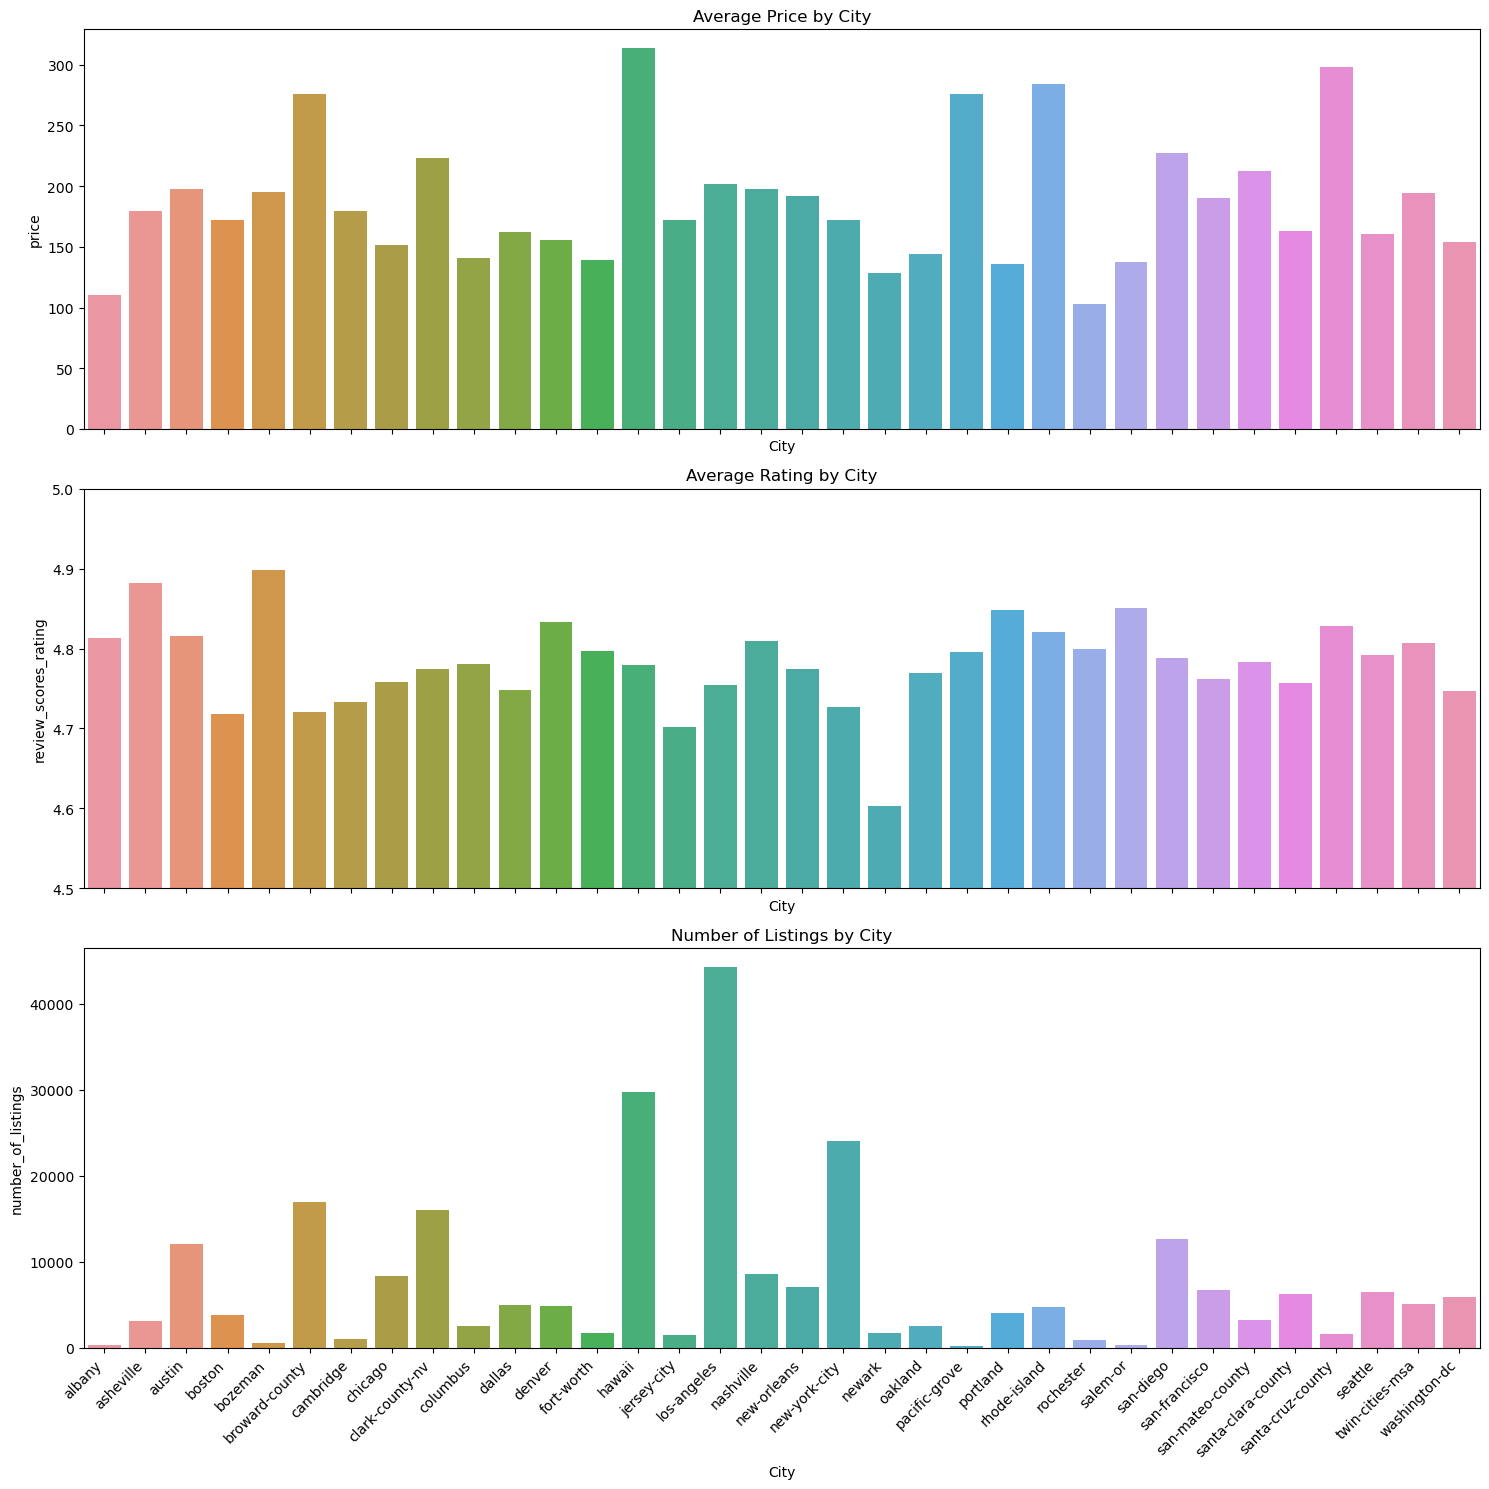

In [254]:
"""
5. Compare city in terms of price, rating, and number of listings.
"""
import seaborn as sns

# Group data by 'City' and calculate average price, rating, total number of listing for each city
city_stats = simple_imputed_df.groupby('City').agg({
    'price': 'mean', 
    'review_scores_rating': 'mean',
    'id': 'count'
}).rename(columns={'id': 'number_of_listings'}).reset_index()

fig, axes = plt.subplots(3, 1, figsize=(15, 15), sharex=True)

# Price
sns.barplot(x='City', y='price', data=city_stats, ax=axes[0])
axes[0].set_title('Average Price by City')

# Rating
sns.barplot(x='City', y='review_scores_rating', data=city_stats, ax=axes[1])
axes[1].set_ylim(4.5, 5)
axes[1].set_title('Average Rating by City')

# Number of listings
sns.barplot(x='City', y='number_of_listings', data=city_stats, ax=axes[2])
axes[2].set_title('Number of Listings by City')

# Rotate x-axis label
for ax in axes:
    for label in ax.get_xticklabels():
        label.set_rotation(45)
        label.set_ha('right')

plt.tight_layout()
plt.show()


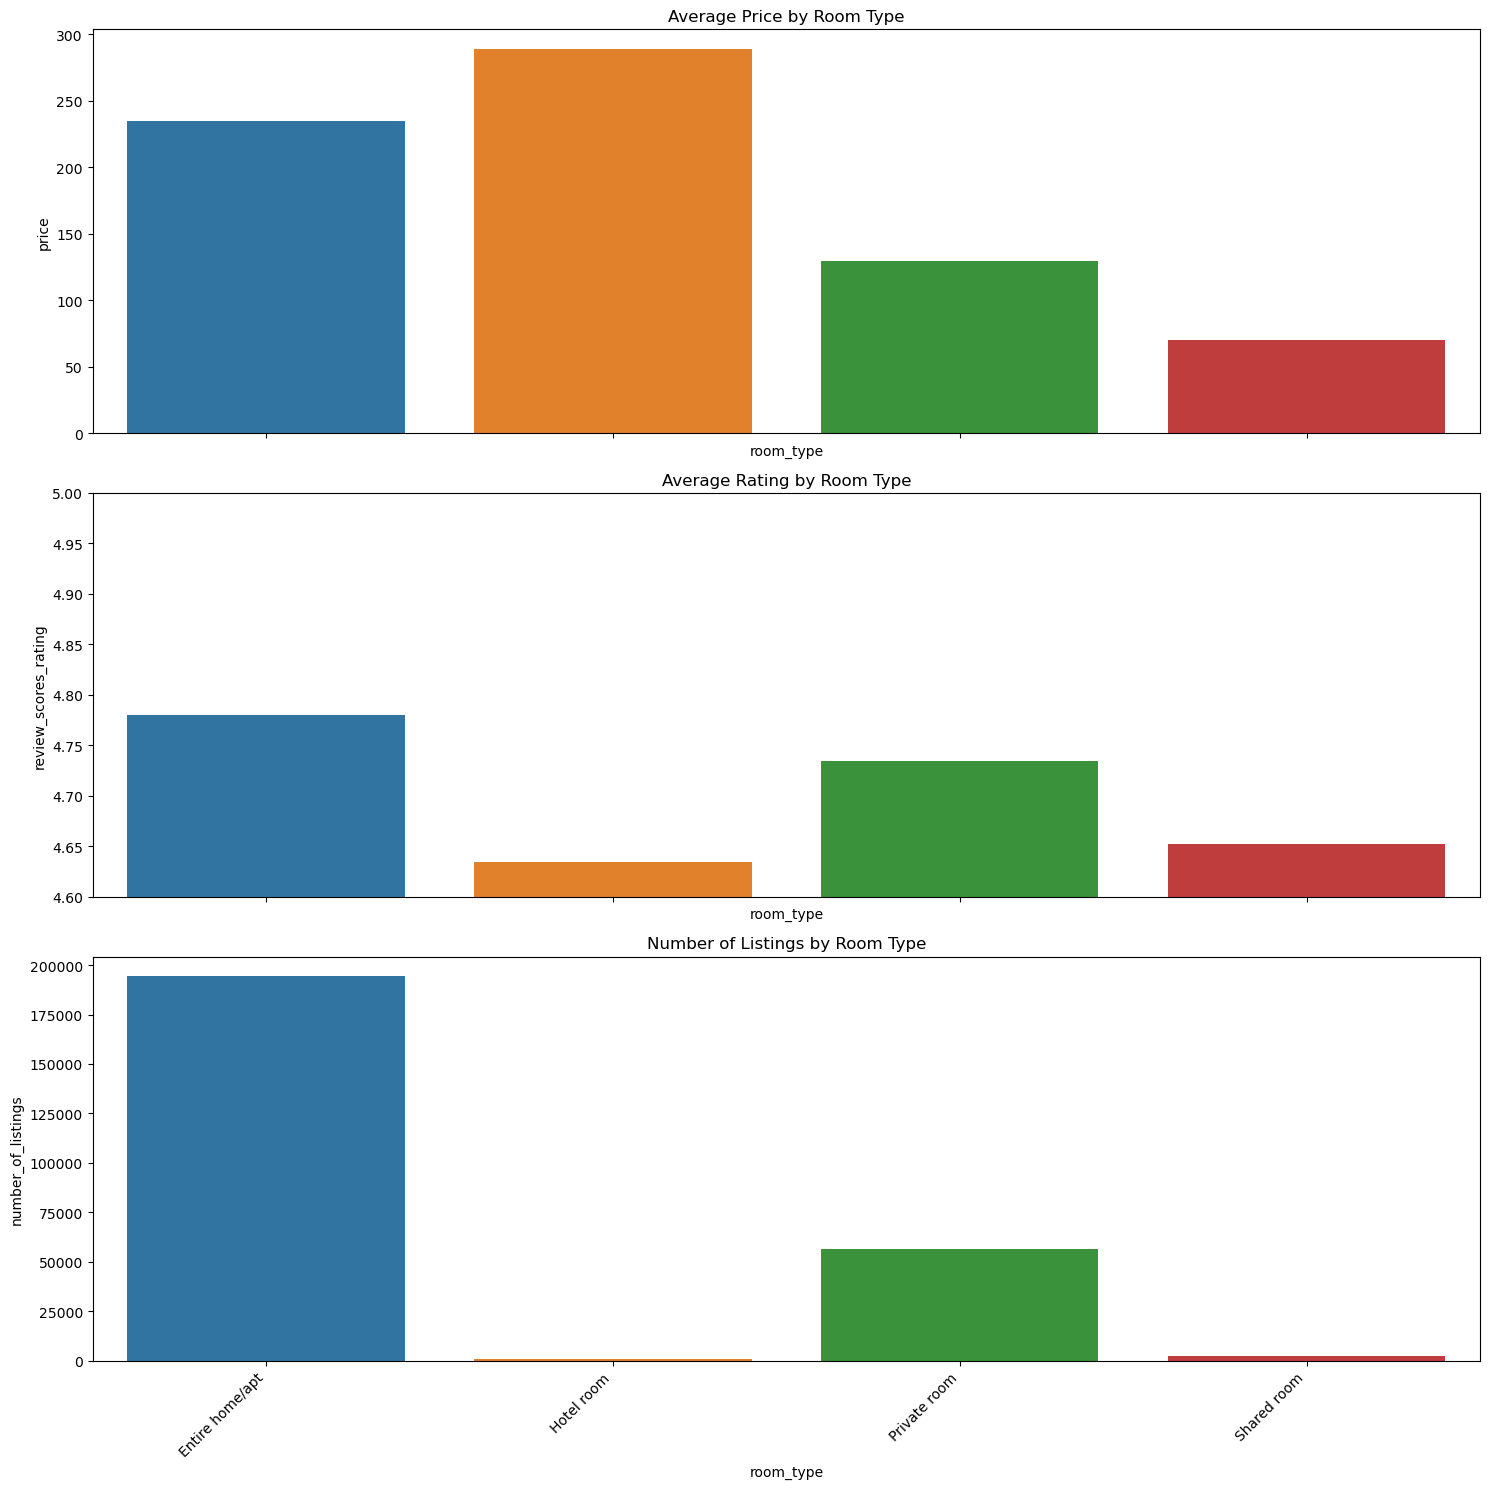

In [255]:
"""
6. Compare room types in terms of price, rating, and number of listing.
"""
# Group data by 'room_type' and calculate average price, rating, total number of listing for each type of room
room_type_stats = simple_imputed_df.groupby('room_type').agg({
    'price': 'mean', 
    'review_scores_rating': 'mean',
    'id': 'count'
}).rename(columns={'id': 'number_of_listings'}).reset_index()

fig, axes = plt.subplots(3, 1, figsize=(15, 15), sharex=True)

# Price
sns.barplot(x='room_type', y='price', data=room_type_stats, ax=axes[0])
axes[0].set_title('Average Price by Room Type')

# Rating
sns.barplot(x='room_type', y='review_scores_rating', data=room_type_stats, ax=axes[1])
axes[1].set_ylim(4.6, 5)
axes[1].set_title('Average Rating by Room Type')

# Number of listings
sns.barplot(x='room_type', y='number_of_listings', data=room_type_stats, ax=axes[2])
axes[2].set_title('Number of Listings by Room Type')

# Rotate x-axis label
for ax in axes:
    for label in ax.get_xticklabels():
        label.set_rotation(45)
        label.set_ha('right')

plt.tight_layout()
plt.show()


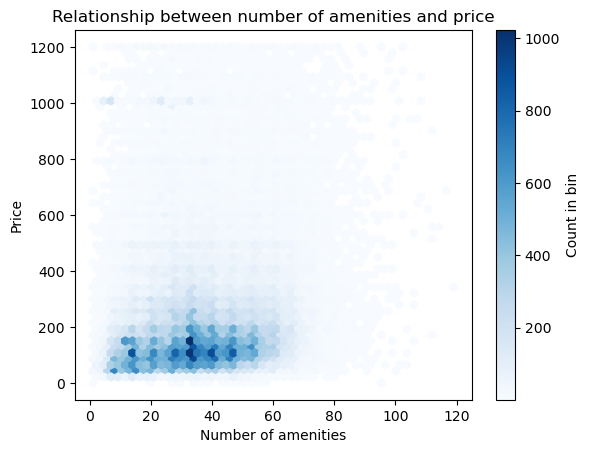

In [256]:
"""
7. Relation between number of amenities and price.
"""

# Relationship between number of amenities and price
df_filtered = simple_imputed_df[simple_imputed_df['amenities'] > 0]
plt.hexbin(df_filtered['amenities'], df_filtered['price'], gridsize=50, cmap='Blues', mincnt=1)
plt.colorbar(label='Count in bin')

plt.title('Relationship between number of amenities and price')
plt.xlabel('Number of amenities')
plt.ylabel('Price')
plt.show()

### Imputation using a Model

In [ ]:
from sklearn.ensemble import HistGradientBoostingRegressor, HistGradientBoostingClassifier

# Select the columns with missing values
num_cols_missing = ['host_response_rate', 'host_acceptance_rate','beds', 'price', 'review_scores_rating', 'review_scores_accuracy','review_scores_cleanliness',
                    'review_scores_checkin', 'review_scores_communication', 'review_scores_location','review_scores_value', 'reviews_per_month', 'bathrooms']

cat_cols_missing = ["host_response_time"]

model_imputed_df = starter_listings_df.copy()

# Impute missing values for each numerical column using Histogram based Gradient Boosting Regressor
for col in tqdm(num_cols_missing):
    # Create a copy of the data with no missing values in the current column
    train_df = model_imputed_df[model_imputed_df[col].notnull()]
    X_train = train_df.drop([col, "neighbourhood_cleansed"], axis=1)
    X_train = pd.get_dummies(X_train, columns=['host_response_time', 'room_type', 'City', 'State'])
    y_train = train_df[col]

    # Build model
    hgbr_regressor = HistGradientBoostingRegressor()
    hgbr_regressor.fit(X_train, y_train)

    # Impute missing values
    X_test = model_imputed_df[model_imputed_df[col].isnull()].drop([col, "neighbourhood_cleansed"], axis=1)
    X_test = pd.get_dummies(X_test, columns=['host_response_time', 'room_type', 'City', 'State'])
    imputed_values = hgbr_regressor.predict(X_test)
    model_imputed_df.loc[model_imputed_df[col].isnull(), col] = imputed_values

100%|██████████| 13/13 [00:56<00:00,  4.38s/it]


In [ ]:
# Impute missing values for host_response_time column using Histogram based Gradient Boosting Classifier

col = cat_cols_missing[0]
train_df = model_imputed_df[model_imputed_df[col].notnull()]
X_train = train_df.drop([col, "neighbourhood_cleansed"], axis=1)
X_train = pd.get_dummies(X_train, columns=['room_type', 'City', 'State'])
y_train = train_df[col]

# Build model
hgbr_classifier = HistGradientBoostingClassifier()
hgbr_classifier.fit(X_train, y_train)

# Impute missing values
X_test = model_imputed_df[model_imputed_df[col].isnull()].drop([col, "neighbourhood_cleansed"], axis=1)
X_test = pd.get_dummies(X_test, columns=['room_type', 'City', 'State'])
imputed_values = hgbr_classifier.predict(X_test)
model_imputed_df.loc[model_imputed_df[col].isnull(), col] = imputed_values

In [ ]:
model_imputed_df["neighbourhood_cleansed"] = model_imputed_df["neighbourhood_cleansed"].fillna(model_imputed_df["neighbourhood_cleansed"].mode().iloc[0])
model_imputed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103643 entries, 0 to 103642
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype   
---  ------                          --------------   -----   
 0   id                              103643 non-null  int64   
 1   host_id                         103643 non-null  int64   
 2   host_response_time              103643 non-null  category
 3   host_response_rate              103643 non-null  float64 
 4   host_acceptance_rate            103643 non-null  float64 
 5   host_is_superhost               103643 non-null  category
 6   host_identity_verified          103643 non-null  category
 7   neighbourhood_cleansed          103643 non-null  category
 8   latitude                        103643 non-null  float64 
 9   longitude                       103643 non-null  float64 
 10  room_type                       103643 non-null  category
 11  accommodates                    103643 non-null  int64   
 12  be